## 1. Support Vector Machine

### 1.1 Example Dataset 1

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
%matplotlib inline

raw_data = loadmat("/Users/natalychacon/Documents/Machine Learning/std coursera/machine-learning-ex/ex6/ex6data1.mat")

In [19]:
raw_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

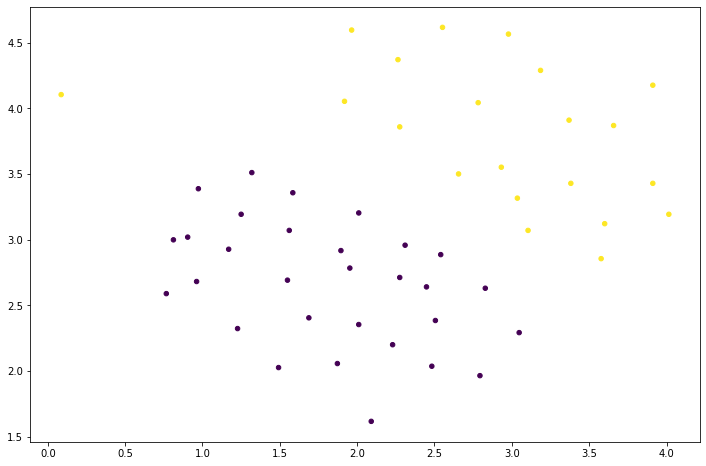

In [42]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']
plt.figure(figsize=(12,8))
plt.scatter(data.X1, data.X2, s=20,c=data.y) 

In this part of the exercise, you will try using different values of the  parameter with SVMs. Informally, the  parameter is a positive value that controls the penalty for misclassiffed training examples. 

In [113]:
from sklearn import svm
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=10000)
svc

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=10000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

For the first experiment we'll use C=1 and see how it performs.

In [114]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.9803921568627451

For the second experiment we'll use C = 120.

In [117]:
svc2 = svm.LinearSVC(C=120, loss='hinge', max_iter=1000)
svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])

/Users/natalychacon/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1.0

When , you should find that the SVM now classifies every single example correctly, but has a decision boundary that does not appear to be a natural fit for the data 

Text(0.5, 1.0, 'SVM (C=1) Decision Confidence')

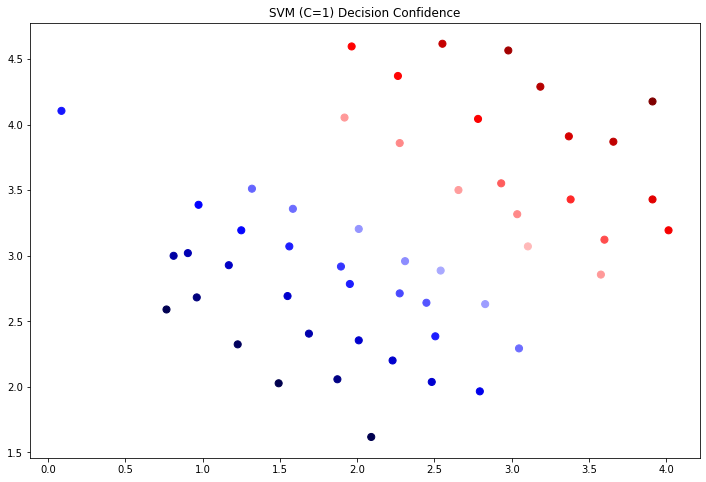

In [118]:
data['SVM 1 Confidence'] = svc.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')

Text(0.5, 1.0, 'SVM (C=120) Decision Confidence')

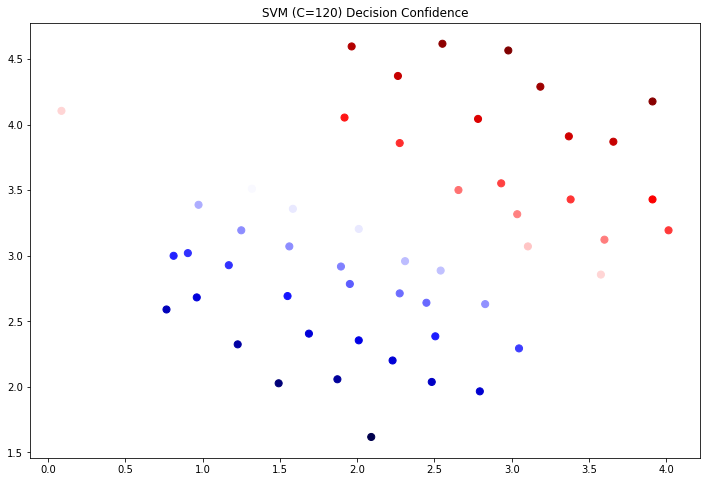

In [164]:
data['SVM 2 Confidence'] = svc2.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 2 Confidence'], cmap='seismic')
ax.set_title('SVM (C=120) Decision Confidence')

### 1.2 SVM with gaussian Kernels

### 1.2.1 Gaussian kernel

In [136]:
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2

In [144]:
def gaussianKernel(x1,x2,sigma):
    sim = np.exp(-(np.sum(np.power((x1-x2),2)))/(2*np.power(sigma,2)))
    return sim

In [154]:
gaussianKernel(x1,x2,sigma)

0.32465246735834974

### 1.2.2 Example dataset 2

This data set has a non linear decision boundary. 

In [145]:
raw_data2 = loadmat("/Users/natalychacon/Documents/Machine Learning/std coursera/machine-learning-ex/ex6/ex6data2.mat")

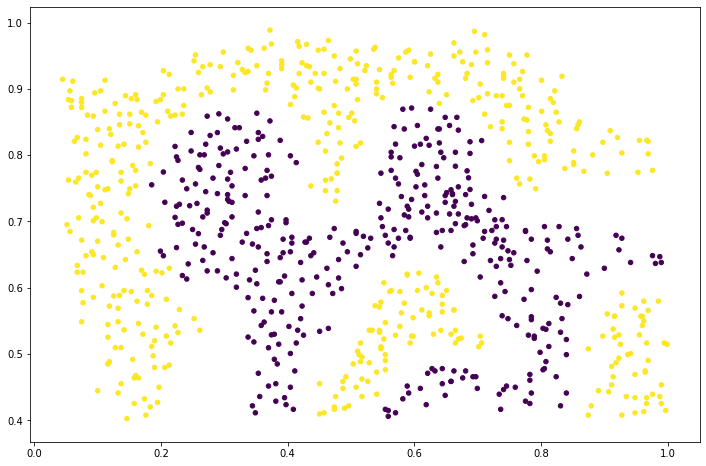

In [152]:
data2 = pd.DataFrame(raw_data2['X'], columns=['X1', 'X2'])
data2['y'] = raw_data2['y']
plt.figure(figsize=(12,8))
plt.scatter(data2.X1, data2.X2, s=20,c=data2.y) 

In [155]:
svc3 = svm.SVC(C=100, gamma=10, probability=True)
svc3

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [161]:
svc3.fit(data2[['X1', 'X2']], data2['y'])
svc3.score(data2[['X1', 'X2']], data2['y'])

0.9698725376593279

To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label. 

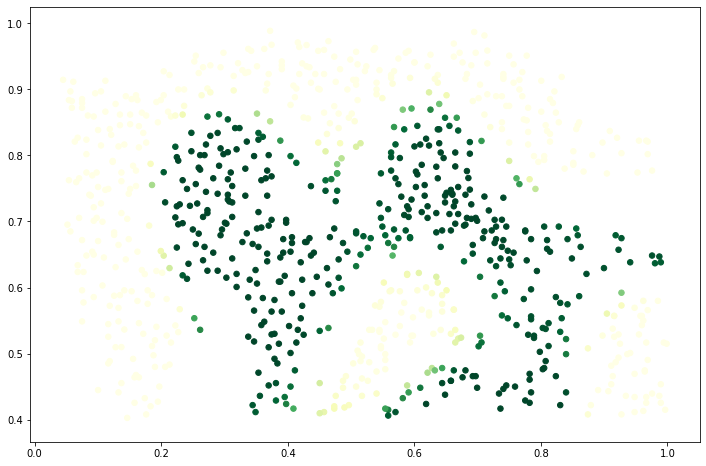

In [169]:
data2['Probability'] = svc3.predict_proba(data2[['X1', 'X2']])[:,0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data2['X1'], data2['X2'], s=30, c=data2['Probability'], cmap='YlGn')

### 1.2.3 Example dataset 3

In [170]:
raw_data3 = loadmat("/Users/natalychacon/Documents/Machine Learning/std coursera/machine-learning-ex/ex6/ex6data3.mat")

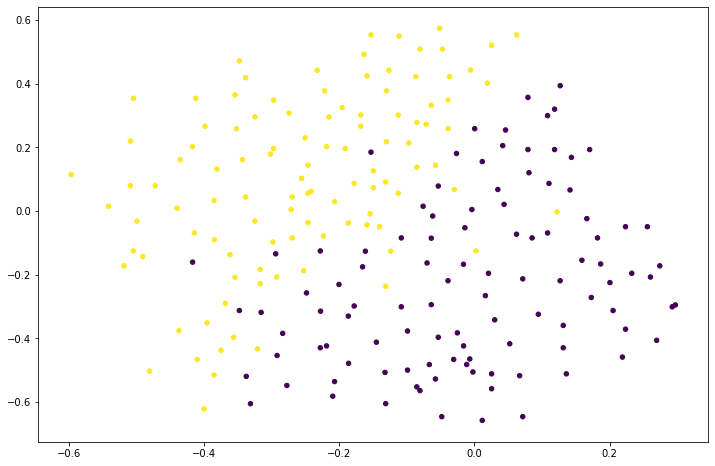

In [175]:
data3 = pd.DataFrame(raw_data3['X'], columns=['X1', 'X2'])
data3['y'] = raw_data3['y']
plt.figure(figsize=(12,8))
plt.scatter(data3.X1, data3.X2, s=20,c=data3.y) 

In [192]:
svc4 = svm.SVC(C=100, gamma=10, probability=True)
svc4

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [193]:
svc4.fit(data3[['X1', 'X2']], data3['y'])
svc4.score(data3[['X1', 'X2']], data3['y'])

0.9383886255924171

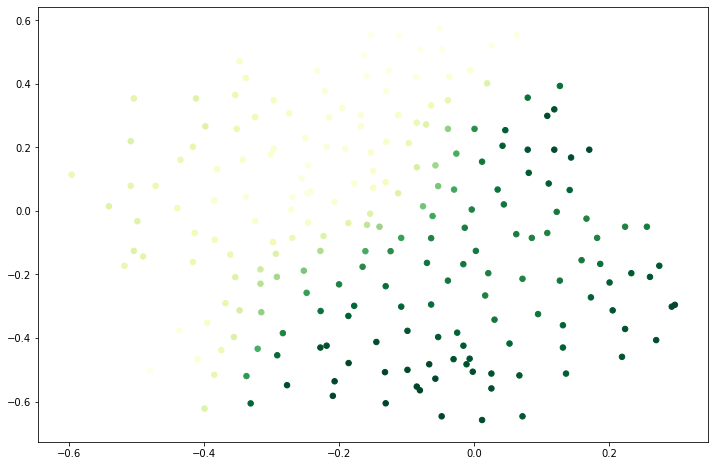

In [194]:
data3['Probability'] = svc4.predict_proba(data3[['X1', 'X2']])[:,0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data3['X1'], data3['X2'], s=30, c=data3['Probability'], cmap='YlGn')